In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier, StackingClassifier
from sklearn.svm import SVC 
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold,cross_validate,cross_val_predict
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Model Training

In [2]:
df1 =pd.read_csv("C:/Users/Sultan/Downloads/ML/ML_Project/3. Stroke Prediction/csv files/1_prep_stroke.csv")
df2 = pd.read_csv("C:/Users/Sultan/Downloads/ML/ML_Project/3. Stroke Prediction/csv files/2_syn_stroke.csv")
df3 = pd.read_csv("C:/Users/Sultan/Downloads/ML/ML_Project/3. Stroke Prediction/csv files/3_prep_sel_stroke.csv")
df4 = pd.read_csv("C:/Users/Sultan/Downloads/ML/ML_Project/3. Stroke Prediction/csv files/4_syn_sel_new_stroke.csv")
df5 = pd.read_csv("C:/Users/Sultan/Downloads/ML/ML_Project/3. Stroke Prediction/csv files/4_syn_sel_orig_stroke.csv")

## TTS

In [5]:
# Function 1: Train/Test Split Evaluation
def evaluate_models_tts(datasets, models, target="stroke", test_size=0.25, random_state=42):
    results = []
    for df_name, df in datasets.items():
        X = df.drop(columns=[target])
        y = df[target]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )

        for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            results.append({
                "Dataset": df_name,
                "Model": model_name,
                "Accuracy": accuracy_score(y_test, y_pred),
                "Precision": precision_score(y_test, y_pred, zero_division=0),
                "Recall": recall_score(y_test, y_pred, zero_division=0),
                "F1-score": f1_score(y_test, y_pred, zero_division=0),
            })

    return pd.DataFrame(results)

In [7]:
# Load your datasets
datasets = {
    "Preprocessed":df1,
    "Synthesized": df2,
    "Preprocessed_Selected": df3,
    "Synthesized_Selected": df4,
    "Synthesized_selected_Orig":df5
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
}

# Evaluate with train/test split
tts_results = evaluate_models_tts(datasets, models)
print("\n--- Train/Test Split Results ---")
print(tts_results)

E:\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:19:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
E:\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:19:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
E:\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:19:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
E:\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:19:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
E:\anaconda\Lib\site-pac


--- Train/Test Split Results ---
                      Dataset                Model  Accuracy  Precision  \
0                Preprocessed  Logistic Regression  0.951066   0.000000   
1                Preprocessed        Random Forest  0.951066   0.000000   
2                Preprocessed              XGBoost  0.932912   0.103448   
3                 Synthesized  Logistic Regression  0.781784   0.730010   
4                 Synthesized        Random Forest  0.927419   0.892259   
5                 Synthesized              XGBoost  0.929791   0.908108   
6       Preprocessed_Selected  Logistic Regression  0.951066   0.000000   
7       Preprocessed_Selected        Random Forest  0.951066   0.000000   
8       Preprocessed_Selected              XGBoost  0.932912   0.103448   
9        Synthesized_Selected  Logistic Regression  0.766129   0.716245   
10       Synthesized_Selected        Random Forest  0.873814   0.827338   
11       Synthesized_Selected              XGBoost  0.897533   0.8

In [8]:
tts_results

,Dataset,Model,Accuracy,Precision,Recall,F1-score
0,Preprocessed,Logistic Regression,0.951066,0.000000,0.000000,0.000000
1,Preprocessed,Random Forest,0.951066,0.000000,0.000000,0.000000
2,Preprocessed,XGBoost,0.932912,0.103448,0.048387,0.065934
3,Synthesized,Logistic Regression,0.781784,0.730010,0.778516,0.753483
4,Synthesized,Random Forest,0.927419,0.892259,0.944629,0.917698
5,Synthesized,XGBoost,0.929791,0.908108,0.930233,0.919037
6,Preprocessed_Selected,Logistic Regression,0.951066,0.000000,0.000000,0.000000
7,Preprocessed_Selected,Random Forest,0.951066,0.000000,0.000000,0.000000
8,Preprocessed_Selected,XGBoost,0.932912,0.103448,0.048387,0.065934
9,Synthesized_Selected,Logistic Regression,0.766129,0.716245,0.751938,0.733657


## k-Fold

In [9]:
# Function 2: K-Fold Cross Validation Evaluation
def evaluate_models_kfold(datasets, models, target="stroke", n_splits=5, random_state=42):
    results = []

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for df_name, df in datasets.items():
        X = df.drop(columns=[target])
        y = df[target]

        for model_name, model in models.items():
            scores = cross_validate(
                model, X, y, cv=skf,
                scoring=["accuracy", "precision", "recall", "f1"],
                return_train_score=False
            )

            results.append({
                "Dataset": df_name,
                "Model": model_name,
                "Accuracy": scores["test_accuracy"].mean(),
                "Precision": scores["test_precision"].mean(),
                "Recall": scores["test_recall"].mean(),
                "F1-score": scores["test_f1"].mean(),
            })

    return pd.DataFrame(results)

In [10]:
# Evaluate with K-Fold
kfold_results = evaluate_models_kfold(datasets, models)
print("\n--- K-Fold Results ---")
print(kfold_results)

E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precisio


--- K-Fold Results ---
                      Dataset                Model  Accuracy  Precision  \
0                Preprocessed  Logistic Regression  0.951046   0.200000   
1                Preprocessed        Random Forest  0.950059   0.200000   
2                Preprocessed              XGBoost  0.939600   0.158772   
3                 Synthesized  Logistic Regression  0.792263   0.742715   
4                 Synthesized        Random Forest  0.931427   0.897994   
5                 Synthesized              XGBoost  0.926325   0.905147   
6       Preprocessed_Selected  Logistic Regression  0.951046   0.200000   
7       Preprocessed_Selected        Random Forest  0.950454   0.350000   
8       Preprocessed_Selected              XGBoost  0.939600   0.154762   
9        Synthesized_Selected  Logistic Regression  0.769485   0.720206   
10       Synthesized_Selected        Random Forest  0.877922   0.833647   
11       Synthesized_Selected              XGBoost  0.888718   0.867179   
1

In [11]:
kfold_results

,Dataset,Model,Accuracy,Precision,Recall,F1-score
0,Preprocessed,Logistic Regression,0.951046,0.200000,0.004000,0.007843
1,Preprocessed,Random Forest,0.950059,0.200000,0.004000,0.007843
2,Preprocessed,XGBoost,0.939600,0.158772,0.048327,0.073653
3,Synthesized,Logistic Regression,0.792263,0.742715,0.788478,0.764828
4,Synthesized,Random Forest,0.931427,0.897994,0.947674,0.922150
5,Synthesized,XGBoost,0.926325,0.905147,0.925247,0.915039
6,Preprocessed_Selected,Logistic Regression,0.951046,0.200000,0.004000,0.007843
7,Preprocessed_Selected,Random Forest,0.950454,0.350000,0.012000,0.022943
8,Preprocessed_Selected,XGBoost,0.939600,0.154762,0.044327,0.067419
9,Synthesized_Selected,Logistic Regression,0.769485,0.720206,0.756087,0.737584


 ## Ensemble Method

In [12]:
#syn_random_xgb
#syn_sel_orig_rand_xgb

In [25]:
#training random and xgb on synthesized df
X_syn = df2.drop(['stroke'],axis=1)
y_syn = df2['stroke']

In [26]:
X_train_syn,X_test_syn,y_train_syn,y_test_syn = train_test_split(X_syn,y_syn,test_size = 0.25,random_state=42)

In [27]:
rf_syn = RandomForestClassifier(random_state=42)

In [28]:
rf_syn.fit(X_train_syn,y_train_syn)

RandomForestClassifier(random_state=42)

In [29]:
y_pred_syn = rf_syn.predict(X_test_syn)

In [30]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_syn, y_pred_syn))
print("Precision:", metrics.precision_score(y_test_syn, y_pred_syn))
print("Recall:", metrics.recall_score(y_test_syn, y_pred_syn))
print("f1-score:", metrics.f1_score(y_test_syn, y_pred_syn))

Accuracy: 0.9274193548387096
Precision: 0.9040667361835245
Recall: 0.9342672413793104
f1-score: 0.918918918918919


In [33]:
xgb_syn = XGBClassifier()

## Using Kfold

In [46]:
datasets_kfold = {
    "Preprocessed (All Features)": (df1.drop("stroke", axis=1), df1["stroke"]),
    "Preprocessed (Selected Features)": (df3.drop("stroke", axis=1), df3["stroke"]),
    "SMOTE Balanced (All Features)": (df2.drop("stroke", axis=1), df2["stroke"]),
    "SMOTE Balanced (Selected Features)": (df4.drop("stroke", axis=1), df4["stroke"])
}

In [55]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

In [56]:
voting_hard = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('xgb', xgb)],
    voting='hard'
)
voting_soft = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('xgb', xgb)],
    voting='soft'
)
stacking = StackingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('xgb', xgb)],
    final_estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
    cv=10
)

In [57]:
# Models dict
ensemble_models = {
    "Voting (Hard)": voting_hard,
    "Voting (Soft)": voting_soft,
    "Stacking": stacking
}

In [58]:
# Evaluation function
def evaluate_ensembles(datasets, models, target_col="target"):
    results = []
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for ds_name, df in datasets.items():
        X = df.drop(columns=[target_col])
        y = df[target_col]

        for model_name, model in models.items():
            # If it's hard voting → no ROC-AUC
            if "Voting (Hard)" in model_name:
                scoring_used = ['accuracy', 'precision', 'recall', 'f1']
            else:
                scoring_used = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

            cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring_used, n_jobs=-1)

            # Build results dictionary dynamically
            result = {
                "Dataset": ds_name,
                "Model": model_name,
                "Accuracy": f"{np.mean(cv_results['test_accuracy']):.3f} ± {np.std(cv_results['test_accuracy']):.3f}",
                "Precision": f"{np.mean(cv_results['test_precision']):.3f} ± {np.std(cv_results['test_precision']):.3f}",
                "Recall": f"{np.mean(cv_results['test_recall']):.3f} ± {np.std(cv_results['test_recall']):.3f}",
                "F1 Score": f"{np.mean(cv_results['test_f1']):.3f} ± {np.std(cv_results['test_f1']):.3f}"
            }

            # Only add ROC-AUC if available
            if "roc_auc" in scoring_used:
                result["ROC-AUC"] = f"{np.mean(cv_results['test_roc_auc']):.3f} ± {np.std(cv_results['test_roc_auc']):.3f}"

            results.append(result)

    return pd.DataFrame(results)

In [59]:
df_ensemble_results = evaluate_ensembles(datasets, ensemble_models, target_col="stroke")

In [60]:
df_ensemble_results

,Dataset,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Preprocessed,Voting (Hard),0.950 ± 0.001,0.000 ± 0.000,0.000 ± 0.000,0.000 ± 0.000,NaN
1,Preprocessed,Voting (Soft),0.950 ± 0.002,0.200 ± 0.400,0.004 ± 0.008,0.008 ± 0.016,0.826 ± 0.017
2,Preprocessed,Stacking,0.950 ± 0.002,0.200 ± 0.400,0.004 ± 0.008,0.008 ± 0.016,0.834 ± 0.019
3,Synthesized,Voting (Hard),0.921 ± 0.008,0.885 ± 0.013,0.937 ± 0.010,0.910 ± 0.009,NaN
4,Synthesized,Voting (Soft),0.921 ± 0.006,0.883 ± 0.011,0.940 ± 0.009,0.911 ± 0.007,0.977 ± 0.003
5,Synthesized,Stacking,0.946 ± 0.005,0.931 ± 0.006,0.946 ± 0.007,0.938 ± 0.005,0.988 ± 0.002
6,Preprocessed_Selected,Voting (Hard),0.950 ± 0.002,0.200 ± 0.400,0.004 ± 0.008,0.008 ± 0.016,NaN
7,Preprocessed_Selected,Voting (Soft),0.950 ± 0.002,0.200 ± 0.400,0.004 ± 0.008,0.008 ± 0.016,0.829 ± 0.016
8,Preprocessed_Selected,Stacking,0.950 ± 0.001,0.200 ± 0.400,0.004 ± 0.008,0.008 ± 0.016,0.835 ± 0.018
9,Synthesized_Selected,Voting (Hard),0.879 ± 0.003,0.837 ± 0.004,0.890 ± 0.015,0.863 ± 0.005,NaN


In [61]:
base_learners = [
    ('lr', LogisticRegression(max_iter=1000, solver="liblinear", random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', random_state=42))
]
meta_learner = LogisticRegression(max_iter=1000, solver="liblinear", random_state=42)
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=10,
    n_jobs=-1
)
X = df2.drop(columns=["stroke"])
y = df2["stroke"]
stacking_model.fit(X, y)

StackingClassifier(cv=10,
                   estimators=[('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42,
                                                   solver='liblinear')),
                               ('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              en...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42,
                                                      solver='liblinear'),
                   n_jobs=-1)

In [62]:
y_pred = stacking_model.predict(X)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred_oof = cross_val_predict(stacking_model, X, y, cv=cv, method='predict', n_jobs=-1)
y_proba_oof = cross_val_predict(stacking_model, X, y, cv=cv, method='predict_proba', n_jobs=-1)[:, 1]

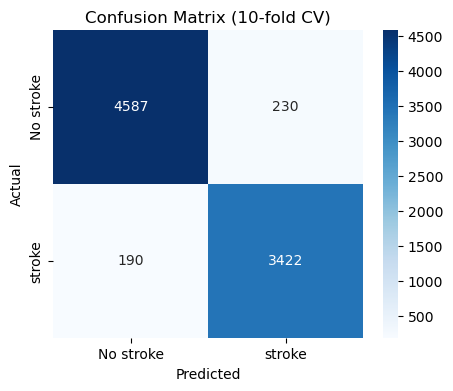

In [64]:
cm = confusion_matrix(y, y_pred_oof)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No stroke", "stroke"],
            yticklabels=["No stroke", "stroke"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (10-fold CV)")
plt.show()

In [65]:
joblib.dump(stacking_model,"stacking_model_stroke.pkl")

['stacking_model_stroke.pkl']